In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Import local modules
from src.DLA import dla_simulation, init_mask, find_optimal_omega
from src.monte_carlo import *
from src.gray_scott import gray_scott_simulation


### Define parameter settings for equation based DLA

In [2]:
# Set the parameters
N = 100
max_size = 1000
tol = 1e-5
omega = 1.8

mask = init_mask(N)
grid = np.zeros((N, N))
grid[0, :] = 1.0

### Run simulation and show example cluster

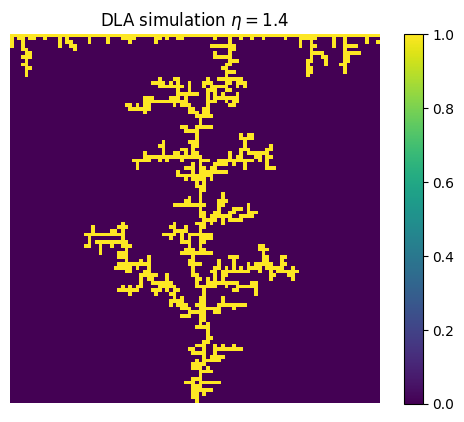

In [3]:
eta = 1.4
mask_history, grid_history, _ = dla_simulation(omega, eta, grid, max_size, N, tol, mask)
# animate the simulation
fig, ax = plt.subplots()

image = grid_history[-1]
image[mask_history[-1]] = 10
img = ax.imshow(image, cmap='viridis', alpha=1, vmin=0, vmax=1)
plt.colorbar(img)

plt.title(r'DLA simulation $\eta = 1.4$')
plt.axis('off')

plt.show()


### Perform parameter sweep over eta values

In [4]:
total_heights = []
total_widths = []
for eta in [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5]:
    print(f"eta = {eta}")
    local_heights = []
    local_widths = []
    for _ in range(10):
        mask_history, grid_history, _ = dla_simulation(omega, eta, grid, max_size, N, tol, mask)
        final_height = np.count_nonzero(np.any(mask_history[-1], axis=1))
        final_width = np.count_nonzero(np.any(mask_history[-1], axis=0))
        final_density = max_size / (final_height * final_width)
        print(f"Final density: {final_density}")
        
        local_heights.append(final_height)
        local_widths.append(final_width)
    
        mask = init_mask(N)
        grid = np.zeros((N, N))
        grid[0, :] = 1.0
    total_heights.append(local_heights)
    total_widths.append(local_widths)

        


eta = 0.1
Final density: 0.1
Final density: 0.5252100840336135
Final density: 0.5
Final density: 0.5099439061703213
Final density: 0.45787545787545786
Final density: 0.45955882352941174
Final density: 0.38138825324180015
Final density: 0.5050505050505051
Final density: 0.4914004914004914
Final density: 0.5341880341880342
eta = 0.3
Final density: 0.4306632213608958
Final density: 0.45599635202918376
Final density: 0.37037037037037035
Final density: 0.38580246913580246
Final density: 0.45454545454545453
Final density: 0.38684719535783363
Final density: 0.4357298474945534
Final density: 0.36443148688046645
Final density: 0.40064102564102566
Final density: 0.4025764895330113
eta = 0.5
Final density: 0.35803795202291444
Final density: 0.34305317324185247
Final density: 0.3306878306878307
Final density: 0.3248862897985705
Final density: 0.33692722371967654
Final density: 0.3024803387779794
Final density: 0.2976190476190476
Final density: 0.33602150537634407
Final density: 0.3214400514304082


### Plot results

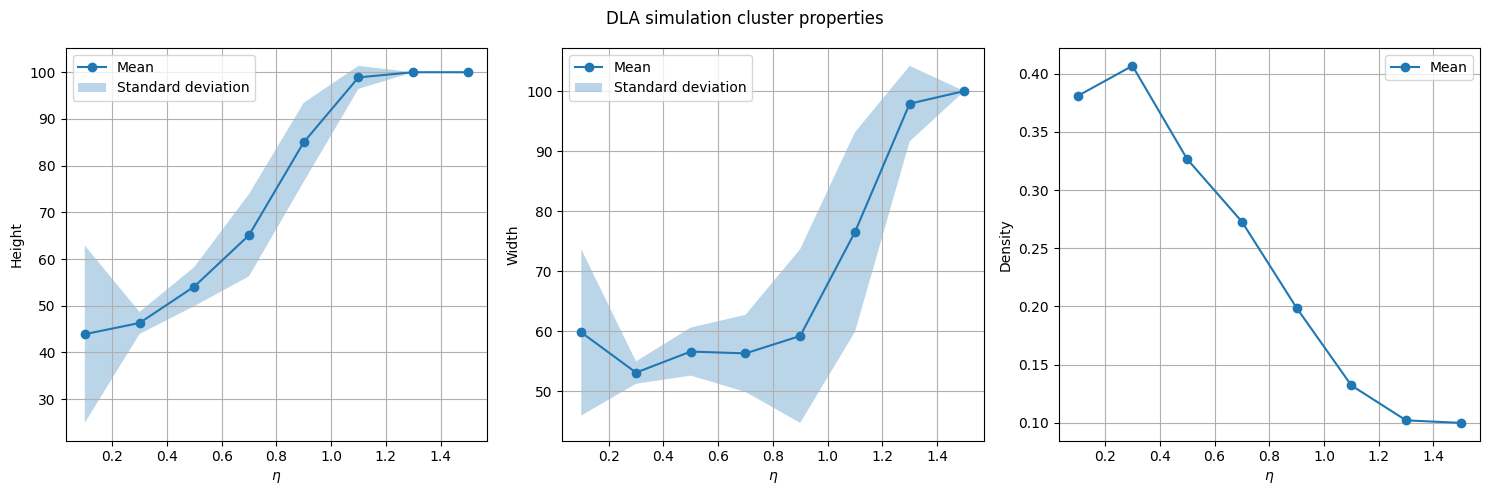

In [5]:
# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Height
ax[0].plot([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_heights, axis=1), 'o-', label='Mean')
ax[0].fill_between([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_heights, axis=1) - np.std(total_heights, axis=1), np.mean(total_heights, axis=1) + np.std(total_heights, axis=1), alpha=0.3, label='Standard deviation')
ax[0].set_xlabel(r'$\eta$')
ax[0].set_ylabel('Height')
ax[0].legend()
ax[0].grid()

# Width
ax[1].plot([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_widths, axis=1), 'o-', label='Mean')
ax[1].fill_between([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], np.mean(total_widths, axis=1) - np.std(total_widths, axis=1), np.mean(total_widths, axis=1) + np.std(total_widths, axis=1), alpha=0.3, label='Standard deviation')
ax[1].set_xlabel(r'$\eta$')
ax[1].set_ylabel('Width')
ax[1].legend()
ax[1].grid()

# Density
ax[2].plot([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5], max_size / (np.mean(total_heights, axis=1) * np.mean(total_widths, axis=1)), 'o-', label='Mean')
ax[2].set_xlabel(r'$\eta$')
ax[2].set_ylabel('Density')
ax[2].legend()
ax[2].grid()


plt.suptitle('DLA simulation cluster properties')
plt.tight_layout()
plt.savefig('fig/cluster_properties.png', dpi=300)
plt.show()


### Find optimal omega

In [6]:
results = find_optimal_omega()

KeyboardInterrupt: 

### Plot results

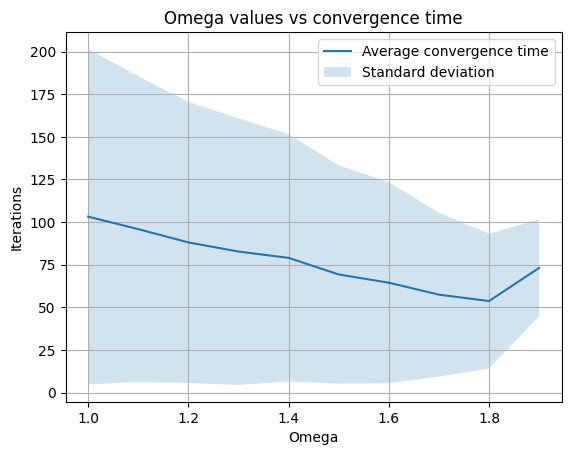

In [ ]:
plt.plot(np.linspace(1.0, 1.9, 10), results[:, 0], label="Average convergence time")
plt.fill_between(np.linspace(1.0, 1.9, 10), results[:, 0] - results[:, 1], results[:, 0] + results[:, 1], alpha=0.2, label="Standard deviation")
plt.xlabel("Omega")
plt.ylabel("Iterations")
plt.legend()
plt.grid()
plt.title("Omega values vs convergence time")
plt.show()

### Calculate execution times

In [ ]:
utimes = []
otimes = []
st = time.time()
for N in [100, 150, 200, 250]:
    st = time.time()
    for r in range(10):
        grid = np.zeros((N, N))
        grid[0, :] = 1.0
        mask = init_mask(N)
        _, _, _ = dla_simulation(omega, 1, grid, 1000, N, 1e-5, mask, False)
    utimes.append((time.time() - st)/10)
    print(f"Unoptimized N = {N} done")


for N in [100, 150, 200, 250]:
    st = time.time()
    for r in range(10):
        grid = np.zeros((N, N))
        grid[0, :] = 1.0
        mask = init_mask(N)
        _, _, _ = dla_simulation(omega, 1, grid, 1000, N, 1e-5, mask, True)
    otimes.append((time.time() - st)/10)
    print(f"Optimized N = {N} done")

Unoptimized N = 100 done
Unoptimized N = 150 done


### Plot excecution times

In [ ]:
plt.plot([100, 150, 200, 250], utimes, label="Unoptimized")
plt.plot([100, 150, 200, 250], otimes, label="Optimized")
plt.xlabel("N")
plt.ylabel("Time [s]")
plt.legend()
plt.grid()
plt.title("Optimization comparison")
plt.show()


### Define parameters for monte carlo simulation

In [ ]:
height = 100
width = 100
size = 1000

p_s_vals = np.linspace(0.1, 1, 6)
max_steps = 50_000
num_runs = 10  
seed = (height - 1, (width // 2))

### Run parameter sweep (with current settings runtime is about 15 minutes)

In [ ]:
visualization_results, avg_densities, avg_heights, avg_widths, std_densities, std_heights, std_widths, all_results = p_sweep(
        height, width, size, p_s_vals, max_steps, seed, num_runs
    )

### Plot example clusters

In [ ]:
plot_p_sweep(visualization_results, p_s_vals, save=True)

### Plot cluster statistics

In [ ]:
plot_metrics(p_s_vals, avg_densities, avg_heights, avg_widths,
                 std_densities, std_heights, std_widths, save=True)

### Gray-Scott plotting

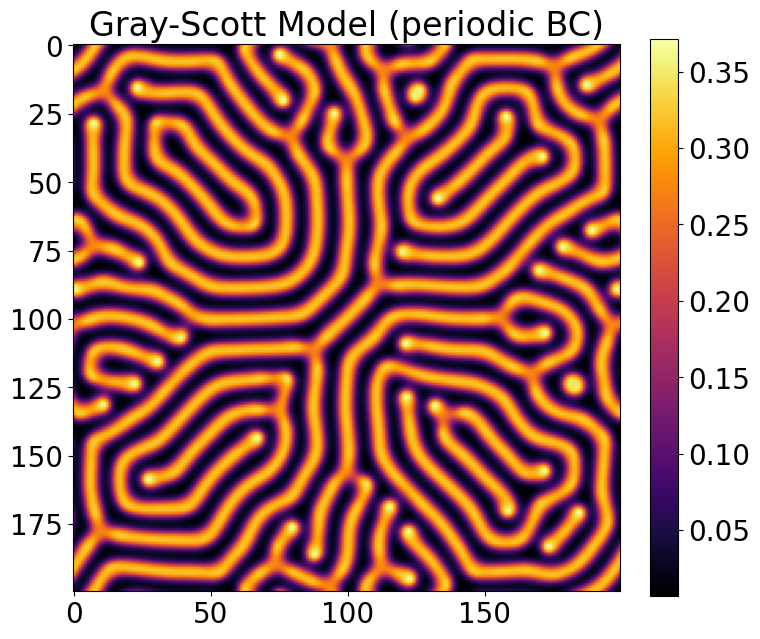

In [ ]:
# Simulation parameters
N = 200
Du, Dv = 0.16, 0.08
f, k = 0.035, 0.060
dt, steps = 1.0, 10000
bc_type = "periodic" # Change boundary condition type here

u, v = gray_scott_simulation(N, Du, Dv, f, k, dt, steps, bc_type)

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create figure with tight layout to remove whitespace
fig, ax = plt.subplots(figsize=(8, 8), tight_layout=True)
im = ax.imshow(v, cmap='inferno')

ax.set_title(f'Gray-Scott Model ({bc_type} BC)')
cbar = fig.colorbar(im, ax=ax, fraction=0.046)